In [4]:
import numpy as np
import pandas as pd
import random
import time

import csv
import os
# import keyboard

In [5]:
class App:
    def __init__(self, name):
        self.name = name
        self.df = None
        self.activities_params = [
            'id'
            ,'Success'
            ,'Elapsed_time'
        ]
        self.client_activities = []
    
    def read_file(self):
        '''
        Пока не будем работать с базой, будем брать весь датафрейм и его менять,
        а потом просто перезаливать базу. Позже реализовать алгоритм, который будет выборочно либо добавлять,
        либо перезаписывать данные по конекретным колонкам
        '''
        self.df = pd.read_excel(self.name)

        self.df['Word'] = self.df['Word'].apply(lambda x: x.capitalize())
        self.df['Translation'] = self.df['Translation'].apply(lambda x: x.capitalize())
        self.df.fillna(0, inplace=True)


    def push_new_word(self):
        word = input("Enter word: ")
        translation = input("Enter translation: ")

        
    def get_word_and_translation(self):
        word_and_translation = self.df.sample(n=1)
        indx = word_and_translation.index
        
        return [
            word_and_translation['id'].values[0]
            ,word_and_translation['Word'].values[0]
            ,word_and_translation['Translation'].values[0]
        ]
    
    
    def check_if_answer_was_correct(self, question):
        answer = input(f"{question} (y/n): ")
        if answer == 'y':
            return True
        elif answer == 'n':
            return False
        else:
            print(f"Didn't get your answer '{answer}'. Try agane. ", end="")
            return self.check_if_answer_was_correct(question)
    
    
    def check_word(self, inverse=False):
        activity = dict(zip(
            self.activities_params
            ,[np.nan]*len(self.activities_params)
        ))
        
        word_and_translation = self.get_word_and_translation()
        indx = word_and_translation[0]
        if inverse == True:
            word, translation = word_and_translation[1::-1]
        elif inverse == False:
            word, translation = word_and_translation[1::]
        else:
            raise TypeError("Only booleans are allowed in inverse")
            
        print(f"Word is '{translation}'.\nWhat is its translation? To see translation press Enter.")
        start = time.time()
        while True:
            check_if_press_enter = input()
            break
        print(f"Translation is '{word}'.", end=' ')
        end = time.time()
        elapsed_time = end - start # time to answer the question
        
        answer = self.check_if_answer_was_correct(question='Was your answer correct?')
        
        activity['id'] = indx
        activity['Success'] = answer
        activity['Elapsed_time'] = elapsed_time
        
        return activity

#         # Correstion accuracy metric
#         if answer == True:
#             self.df.loc[indx, 'TriesNum'] += 1
#             self.df.loc[indx, 'SuccessesNum'] += 1
#         elif answer == False:
#             self.df.loc[indx, 'TriesNum'] += 1
#         self.df.loc[indx, 'Probability'] = 1 - self.df.loc[indx, 'SuccessesNum'] / self.df.loc[indx, 'TriesNum']
                
#         # Correction distibution params
#         self.df.loc[indx, 'MeanTime'] = (
#             (self.df.loc[indx, 'MeanTime'] * (self.df.loc[indx, 'TriesNum'] - 1) + elapsed_time) \
#             / self.df.loc[indx, 'TriesNum']
#         )     
#         if elapsed_time > self.df.loc[indx, 'MaxTime'].values[0]:
#             self.df.loc[indx, 'MaxTime'] = elapsed_time
#         elif elapsed_time < self.df.loc[indx, 'MinTime'].values[0]:
#             self.df.loc[indx, 'MinTime'] = elapsed_time
            
    
    def check_your_vocabulary(self):
        print(f"Let's start training!")
        
        while True:
            activity = self.check_word()
            self.client_activities += [activity]
            answer = self.check_if_answer_was_correct(question='Continue?')
            if answer == False:
                break
        self.write_user_activities_logs(self.client_activities)

    
    def write_user_activities_logs(self, client_activities, file_name ='user_activities_logs.csv'):
        isExist = os.path.exists('user_activities_logs.csv')
        
        with open(file_name, 'a') as f:
            writer = csv.DictWriter(f, fieldnames=self.activities_params)
            if isExist == False:
                writer.writeheader()
            
            for row in client_activities:
                writer.writerow(row)
                
            f.close()
            
    
    def save_file(self):
        self.df.to_excel(self.name)

In [3]:
vocabulary_name = 'Words.xlsx'
app = App(vocabulary_name)

app.read_file()
word = app.check_your_vocabulary()

Let's start training!
Word is 'В общем, в целом'.
What is its translation? To see translation press Enter.


KeyboardInterrupt: 

In [48]:
def metric(x, x_last, x_critical):
    if x >= 0:
        if x >= x_last:
            return 0
        else:
            if x < x_critical:
                return -1 / (x_last * x_critical) * x**2 + 1
            else:
                return -x / x_last + 1
    else:
        return 1
#         raise Exception('Unexpected time values < 0')

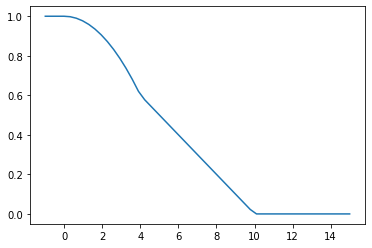

In [52]:
import matplotlib.pyplot as plt

x_last = 10
mean = 4

x = np.linspace(-1, 15)
y = [metric(x_i, x_last, mean) for x_i in x]

plt.plot(x, y)
plt.show()